In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from datetime import datetime
import requests

In [ ]:
data=pd.read_csv("/content/covid_19_india.csv")

In [ ]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [ ]:
data=data.rename(columns={"State/UnionTerritory":'states',"cured":"Recovery"})

In [ ]:
data.head()

,Sno,Date,Time,states,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [ ]:
data=data.rename(columns={"Cured":"Recovery"})

In [ ]:
data.head()

,Sno,Date,Time,states,ConfirmedIndianNational,ConfirmedForeignNational,Recovery,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [ ]:
data =data.drop(columns=['Sno','ConfirmedIndianNational','ConfirmedForeignNational','Time'],axis=1)

In [ ]:
data.head()

,Date,states,Recovery,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [ ]:
data['Active']=data['Confirmed'] - data['Recovery'] - data['Deaths']

In [ ]:
data.head()

,Date,states,Recovery,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0,3.0


In [ ]:
data=data.sort_values(['Date','states']).reset_index(drop=True)
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data

,Date,states,Recovery,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...
15109,NaT,NaN,NaN,NaN,NaN,NaN
15110,NaT,NaN,NaN,NaN,NaN,NaN
15111,NaT,NaN,NaN,NaN,NaN,NaN
15112,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
india_cases=data[data['Date']==data['Date'].max()].copy().fillna(0)
india_cases.index=india_cases['states']
india_cases=india_cases.drop(['states','Date'],axis=1)

In [ ]:
df=pd.DataFrame(pd.to_numeric(india_cases.sum()),dtype=np.float64).transpose()
df.style.background_gradient(cmap='summer_r',axis=1)

,Recovery,Deaths,Confirmed,Active
0,21986363.000000,283248.000000,25496330.000000,3226719.000000


In [ ]:
india_cases.sort_values('Active',ascending=False).head(10).style\
     .background_gradient(cmap='BrBG_r',subset=['Confirmed'])\
     .background_gradient(cmap='YlGn_r',subset=['Deaths'])\
     .background_gradient(cmap='YlOrBr',subset=['Recovery'])\
     .background_gradient(cmap='BuPu',subset=['Active'])

,Recovery,Deaths,Confirmed,Active
states,,,,
Karnataka,1674487.000000,22838.000000,2272374.000000,575049.000000
Maharashtra,4927480.000000,83777.000000,5433506.000000,422249.000000
Kerala,1846105.000000,6612.000000,2200706.000000,347989.000000
Tamil Nadu,1403052.000000,18369.000000,1664350.000000,242929.000000
Andhra Pradesh,1254291.000000,9580.000000,1475372.000000,211501.000000
Rajasthan,713129.000000,7080.000000,879664.000000,159455.000000
Uttar Pradesh,1483249.000000,18072.000000,1637663.000000,136342.000000
West Bengal,1026492.000000,13576.000000,1171861.000000,131793.000000
Gujarat,660489.000000,9269.000000,766201.000000,96443.000000


In [ ]:
import plotly.express as px

def horizontal_bar_chart(df,x,y,title,x_label,y_label,color):
  fig=px.bar(df,x=x,y=y,orientation='h',title=title,
             labels={x:x_label,
                    y:y_label},color_discrete_sequence=[color])
  fig.update_layout(yaxis={'categoryorder':'total ascending'})
  fig.show()

In [ ]:
cnf,dth,rec,act='#393e46','#33ccff','#ff99cc','#fe9801'

In [ ]:
import plotly.graph_objs as go

In [ ]:
import plotly.figure_factory as ff

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
from plotly.offline import init_notebook_mode,iplot

In [ ]:
top_10_confirmed_cases=india_cases.sort_values('Confirmed',ascending=False).head(10).reset_index()
horizontal_bar_chart(top_10_confirmed_cases,'Confirmed','states','Top 10 States with Confirmed Cases','States','Confirmed Cases',cnf)

In [ ]:
top_10_confirmed_cases=india_cases.sort_values('Deaths',ascending=False).head(10).reset_index()
horizontal_bar_chart(top_10_confirmed_cases,'Deaths','states','Top 10 States with Deaths Cases','States','Deaths Cases',dth)

In [ ]:
top_10_active_cases=india_cases.sort_values('Active',ascending=False).head(10).reset_index()
horizontal_bar_chart(top_10_active_cases,'Active','states','Top 10 States with Active Cases','States','Active Cases',act)

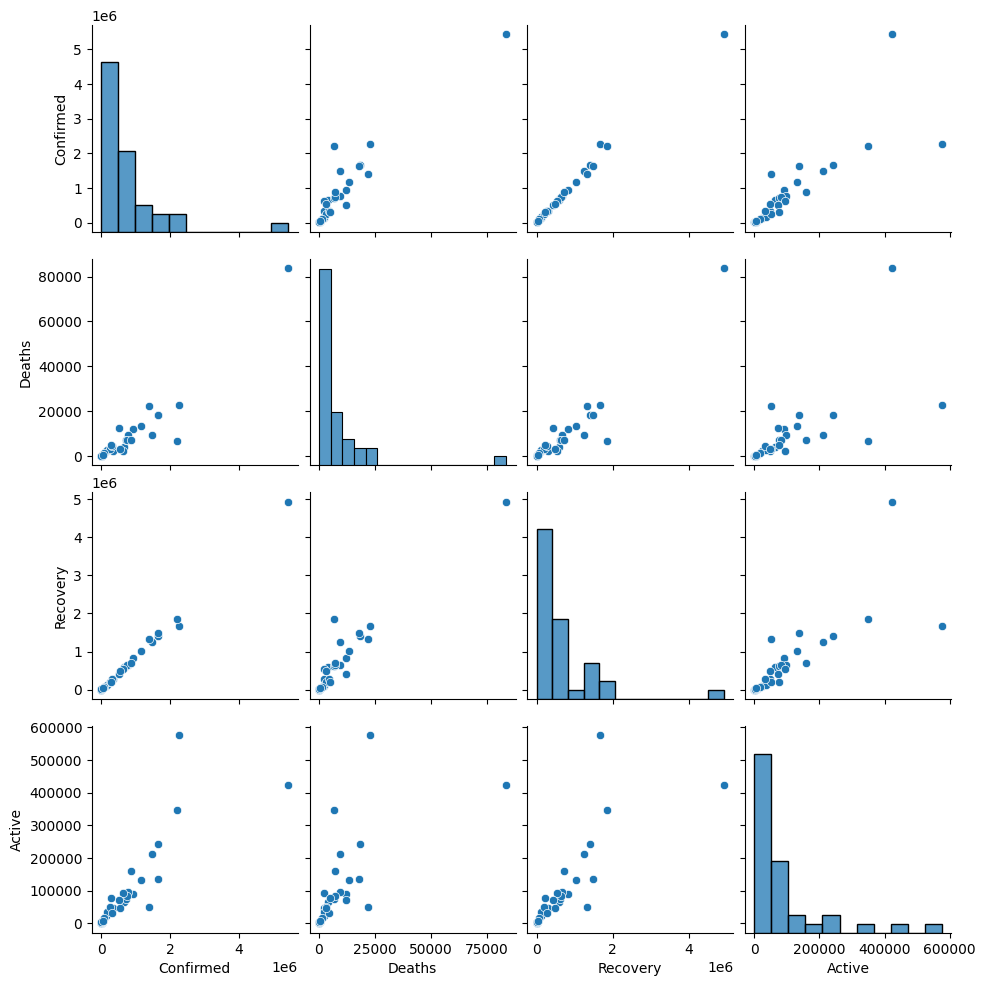

In [ ]:
sns.pairplot(india_cases[['Confirmed','Deaths','Recovery','Active']])
plt.show()

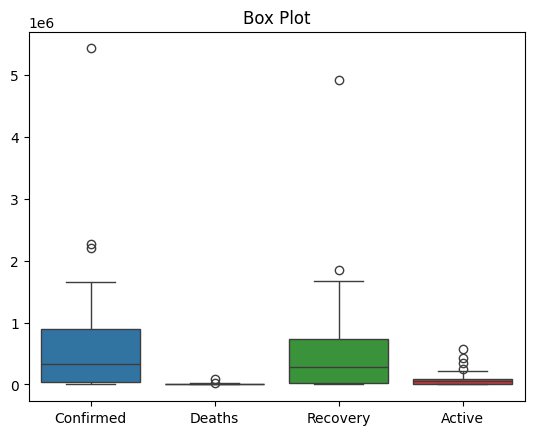

In [ ]:
sns.boxplot(data=india_cases[['Confirmed','Deaths','Recovery','Active']])
plt.title('Box Plot')
plt.show()

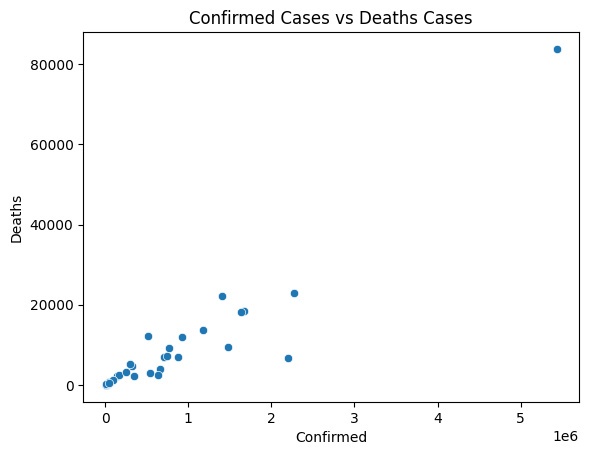

In [ ]:
sns.scatterplot(data=india_cases,x='Confirmed',y='Deaths')
plt.title('Confirmed Cases vs Deaths Cases')
plt.show()


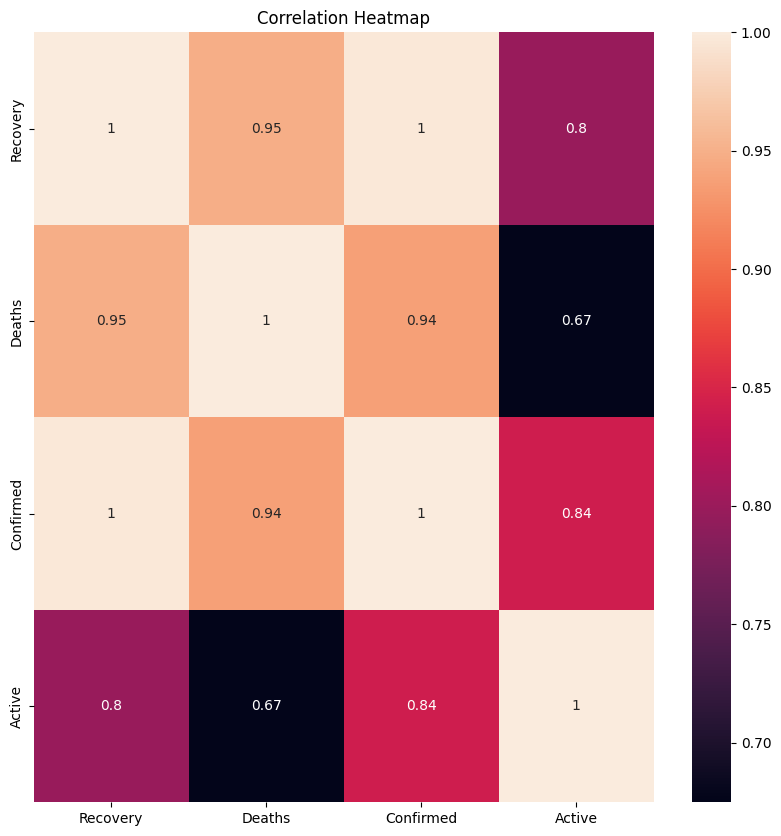

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(india_cases.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()


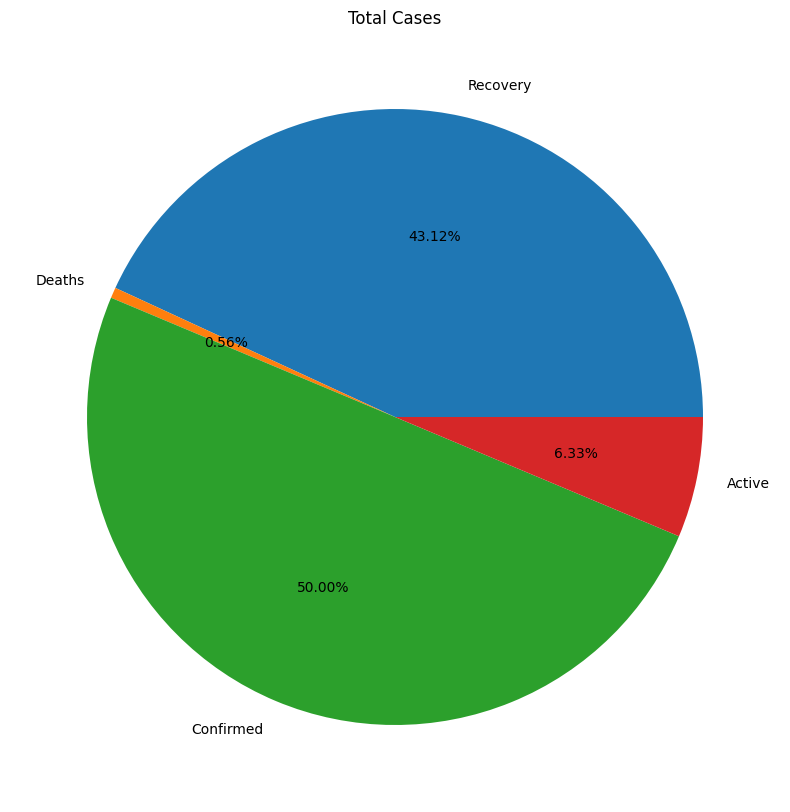

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(india_cases.sum(),labels=india_cases.sum().keys(),autopct='%1.2f%%')
plt.title('Total Cases')
plt.show()

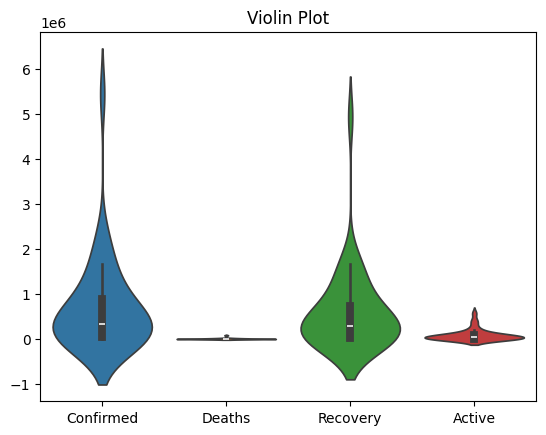

In [ ]:
sns.violinplot(data=india_cases[['Confirmed','Deaths','Recovery','Active']])
plt.title('Violin Plot')
plt.show()

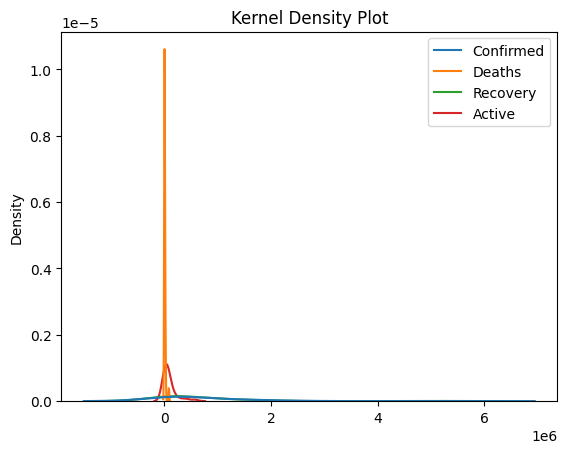

In [ ]:
sns.kdeplot(data=india_cases[['Confirmed','Deaths','Recovery','Active']])
plt.title('Kernel Density Plot')
plt.show()

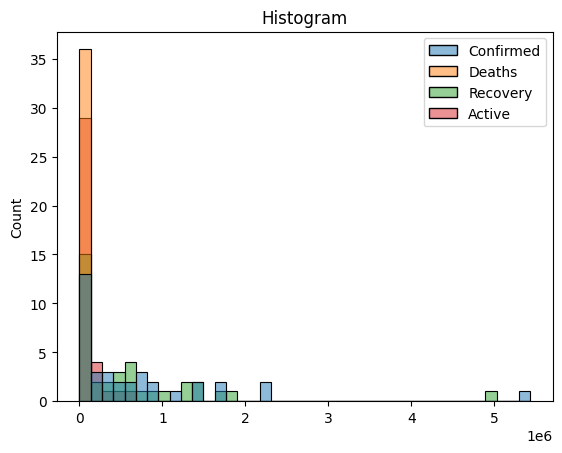

In [ ]:
sns.histplot(data=india_cases[['Confirmed','Deaths','Recovery','Active']])
plt.title('Histogram')
plt.show()

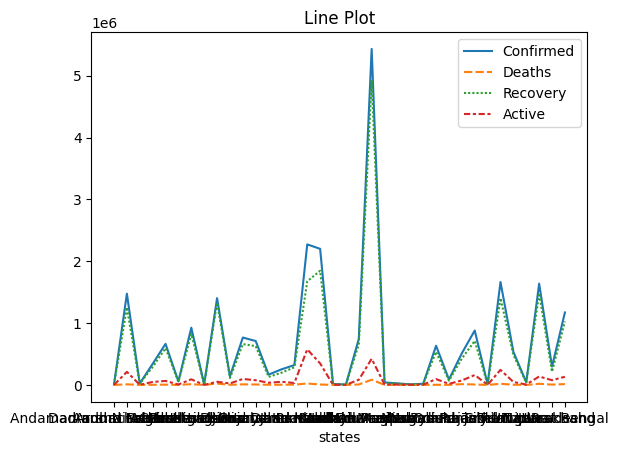

In [ ]:
sns.lineplot(data=india_cases[['Confirmed','Deaths','Recovery','Active']])
plt.title('Line Plot')
plt.show()